## Final Project Submission

Please fill out:
* Student name: Travis Royce
* Student pace: self paced
* Scheduled project review date/time: None Yet
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3


## Project Overview

For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microhsoft's new movie studio can use to help decide what type of films to create.

## The Data

In the folder zippedData are movie datasets from:
Box Office Mojo (https://www.boxofficemojo.com/) 
IMDB (https://www.imdb.com/) 
Rotten Tomatoes (https://www.rottentomatoes.com/) 
TheMovieDB (https://www.themoviedb.org/) 
The Numbers (https://www.the-numbers.com/)

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv , while the data from IMDB is located in a SQLite database

## Analysis Method

There are a variety of metrics that could be used to analyze what types of movies to make. In my opinion, the most important question for a company is "what type of movies are profitable to make?". The second most important question may be "what kind of movies are popular?" which could be deduced through topline revenue analysis, as opposed to bottom-line profit. The third most important question is "what kind of movies do people love?". This question can be analyzed through review data, and has nothing to do with profits. 

These metrics include: 1) median ROI, 2) probability of profitability, 3) revenue, and 4) median review rating.


## Data Retrieval and Cleaning
Because the IMBD data seems to be the most important, I will start by using SQL to unpack the data. 

In [2]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [3]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [4]:
table_names = cur.fetchall()
print(f' The table_names include{table_names}')


 The table_names include[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [5]:
# Query the Movie Basics

mb_query = \
"""
SELECT *
FROM movie_basics
"""
cur.execute(mb_query)
# Movie Basics Table
mb_df = pd.read_sql(mb_query, conn)
mb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


The 'Movie Basics' table has 146,144 rows, and includes genres. 

In [6]:
# Query the directors table
directors_query = \
"""
SELECT *
FROM directors
"""

cur.execute(directors_query)
dir_df = pd.read_sql(directors_query, conn)
dir_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [7]:
# Query the known for table
kf_query = \
"""
SELECT *
FROM known_for
"""

cur.execute(kf_query)
known_for_df = pd.read_sql(kf_query, conn)

print(known_for_df.head())
print(known_for_df.shape)

   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
3  nm0061671  tt0118553
4  nm0061865  tt0896534
(1638260, 2)


The 'Known For' table connects people with the movies they have been a part of. This could be useful in identifying people with great track records. 

In [8]:
# Query the movie_akas table
aka_query = \
"""
SELECT *
FROM movie_akas
"""

cur.execute(aka_query)

aka_df = pd.read_sql(aka_query, conn)
aka_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [9]:
# Query the movie_ratings table
mov_rtg_query = \
"""
SELECT *
FROM movie_ratings
"""

cur.execute(mov_rtg_query)

movie_ratings_df = pd.read_sql(mov_rtg_query, conn)
print(movie_ratings_df.head())
print(movie_ratings_df.shape)

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
(73856, 3)


In [10]:
# Query the persons table
persons_query = \
"""
SELECT *
FROM persons
"""

cur.execute(persons_query)

persons_df = pd.read_sql(persons_query, conn)
print(persons_df.head())
print(persons_df.shape)

   person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator  
(606648, 5)


In [11]:
# Query the principals table
princ_query = \
"""
SELECT *
FROM principals
"""

cur.execute(princ_query)

principals_df = pd.read_sql(persons_query, conn)
print(principals_df.head())
print(principals_df.shape)

   person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator  
(606648, 5)


In [12]:
# Query the writers table
writers_query = \
"""
SELECT *
FROM writers
"""

cur.execute(writers_query)

writers_df = pd.read_sql(writers_query, conn)
print(writers_df.head())
print(writers_df.shape)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0438973  nm0175726
2  tt0438973  nm1802864
3  tt0462036  nm1940585
4  tt0835418  nm0310087
(255873, 2)


This concludes the unpacking of the IMDB database. 

### Unpacking movie_budgets

In [13]:
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv')
print(movie_budgets_df.head())
print(movie_budgets_df.shape)

   id release_date                                        movie  \
0   1    18-Dec-09                                       Avatar   
1   2    20-May-11  Pirates of the Caribbean: On Stranger Tides   
2   3     7-Jun-19                                 Dark Phoenix   
3   4     1-May-15                      Avengers: Age of Ultron   
4   5    15-Dec-17            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross  worldwide_gross  
0     $425,000,000   $760,507,625   $2,776,345,279   
1     $410,600,000   $241,063,875   $1,045,663,875   
2     $350,000,000    $42,762,350     $149,762,350   
3     $330,600,000   $459,005,868   $1,403,013,963   
4     $317,000,000   $620,181,382   $1,316,721,747   
(5782, 6)


The 'Movie Budgets' dataframe contains production budgets from which I can calculate 1) profit and 2) return on investment ('ROI'). Unfortunately, it only has 5,782 observations, which is far fewer than others. 

### Unpacking movie_gross

In [14]:
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
movie_gross_df.head()
print(movie_gross_df.head())
print(movie_gross_df.shape)

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
(3387, 5)


### Observations

The dataframes movie_gross and movie_budgets are very similar, with the main difference being the Studio that produced the movie listed in movie_gross, and not in movie_budgets. Further, movie_gross does not have production budgets, which is important when analyzing movies for the profit they create. 

### Unpacking tmdb.movies.csv

In [15]:
tmdb_mov_df = pd.read_csv('tmdb.movies.csv')
tmdb_mov_df.head()
print(tmdb_mov_df.head())
print(tmdb_mov_df.shape)

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

### Unpacking rt.movie_info.tsv

In [16]:
movinfo_df = pd.read_csv('rt.movie_info.tsv', delimiter = '\t')
movinfo_df
print(movinfo_df.head())
print(movinfo_df.shape)

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

While thie 'rt.movie_info' table has new information in it -- namely synopsys -- it only has 1500 observations, leading me to think it may have limited use in this case. 

### Unpacking rt.reviews.tsv


In [17]:
reviews_df = pd.read_csv(
    'rt.reviews.tsv', delimiter = '\t', encoding= 'unicode_escape')
reviews_df
print(reviews_df.head())
print(reviews_df.shape)

   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  
(54432, 8)


## Profit and Return on Investment

As this analysis is to be used for corporate purposes, the most important metrics should be profit metrics, as opposed to ratings. It would be of little use for the company to make well-rated movies which lost money. 

All in all, we have 14 different data frames to work with:
- dir_df 
- known_for_df 
- mb_df
- movie_budgets_df
- movie_gross_df
- movie_ratings_df
- movinfo_df
- persons_df
- principals_df
- reviews_df
- tmdb_mov_df
- writers_df


The first thing I want to do is add profit metrics to the data, as the purpose of this analysis is to find profitable movies or movie types. 

To do this, I will work with the movie budgets dataframe. 

The movie budgets dataframe is smaller in scale than some of the others -- containing around 5,500 observations -- but it is the only table in the group that can be used to calculate profit.

In [18]:
# Changing columns to numeric type to calculate profit and ROI
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '')
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '')
movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,"$760,507,625",2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,7-Jun-19,Dark Phoenix,350000000,"$42,762,350",149762350
3,4,1-May-15,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


In [19]:
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'])
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'])
# Calculating profit column
movie_budgets_df['profit'] = (
    movie_budgets_df.worldwide_gross - movie_budgets_df.production_budget)

Now, I want to find the percentage of profit each movie returned, commonly known as ROI or return on investment. 

In [21]:
# Calculating ROI column
movie_budgets_df['ROI'] = (
    movie_budgets_df.profit / movie_budgets_df.production_budget) * 100

#Sort all movies by ROI
roi_df = movie_budgets_df.sort_values('ROI', ascending = False)

### Adding Genres and Data Cleaning

Next, I would like to add genre to these movies. 

Genre is in mb_df, so I will join that data frame with movie_budgets_df.

In [23]:
mb_df['movie'] = mb_df['primary_title']
mb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera


In [24]:
new_roi_df = pd.merge(roi_df, mb_df, how = 'left', on = 'movie')

In [25]:
new3_roi_df = roi_df.set_index('movie').join(mb_df.set_index('movie'))
new3_roi_df.sort_values('ROI', ascending = False)

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
movie,,,,,,,,,,,,,
Deep Throat,46,30-Jun-72,25000,"$45,000,000",45000000,44975000,179900.000000,NaN,NaN,NaN,NaN,NaN,NaN
Mad Max,14,21-Mar-80,200000,"$8,750,000",99750000,99550000,49775.000000,NaN,NaN,NaN,NaN,NaN,NaN
Paranormal Activity,93,25-Sep-09,450000,"$107,918,810",194183034,193733034,43051.785333,NaN,NaN,NaN,NaN,NaN,NaN
The Gallows,80,10-Jul-15,100000,"$22,764,410",41656474,41556474,41556.474000,tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
The Blair Witch Project,7,14-Jul-99,600000,"$140,539,099",248300000,247700000,41283.333333,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sharkskin,86,19-Jan-16,2100000,$0,0,-2100000,-100.000000,tt2317796,Sharkskin,Sharkskin,2015.0,100.0,"Comedy,Drama,Mystery"
Against the Wild,33,11-Mar-14,1800000,$0,0,-1800000,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN
Shark Lake,1,1-Dec-15,2000000,$0,0,-2000000,-100.000000,tt4416518,Shark Lake,Shark Lake,2015.0,92.0,"Action,Adventure,Crime"


In [26]:
mb_df['movie'] = mb_df['primary_title']
new4_roi_df = mb_df.set_index('movie').join(roi_df.set_index('movie'))
new4_roi_df = new4_roi_df.sort_values('ROI', ascending = False)

In [27]:
# Remove Duplicates and NaN
new4_roi_df = new4_roi_df.drop_duplicates()
new4_roi_df = new4_roi_df.drop_duplicates(subset = 'movie_id')
new4_roi_df = new4_roi_df.dropna(
    subset = ['production_budget','worldwide_gross'])

In [28]:
# Was the movie profitable? Adding column.
new4_roi_df['profitable'] = np.where(new4_roi_df['profit'] > 0, 1, 0)

After dropping all rows with NAN in their production budget or worldwide gross, we are left with around 3800 observations to analyze. 


In [29]:
# Getting the median ROI per genre.
agg_df = new4_roi_df.groupby('genres')['ROI'].agg(['median','count', 'mean', 'std']).reset_index()
# Sort by median ROI
agg_df = agg_df.sort_values(by = ('median'), ascending=False)
# Round the aggregate numbers
agg_df['median'] = round(agg_df['median'], 0)
agg_df['mean'] = round(agg_df['mean'], 0)
agg_df['std'] = round(agg_df['std'], 0)


In [30]:
# Split the genres column into multiple columns, to seperate the genres.
sep_genre_df = pd.concat([new4_roi_df, new4_roi_df['genres'].str.split(
    ',', expand=True)], axis=1)
# Rename genres columns
sep_genre_df = sep_genre_df.rename(
    columns={0: 'genre_primary', 1: 'genre_secondary', 2: 'genre_three'})
# Group by primary genres
prime_genre_df = sep_genre_df.groupby(
    'genre_primary')['ROI'].agg(
        ['median','count', 'mean', 'std']).reset_index()
# Sort by median value
prime_genre_df = prime_genre_df.sort_values('median', ascending = False)
# Filter out primary genres with counts under 25
prime_genre_df = prime_genre_df.loc[prime_genre_df['count'] > 24]


### Median ROI by Genre

Text(0.5, 1.0, 'Median ROI')

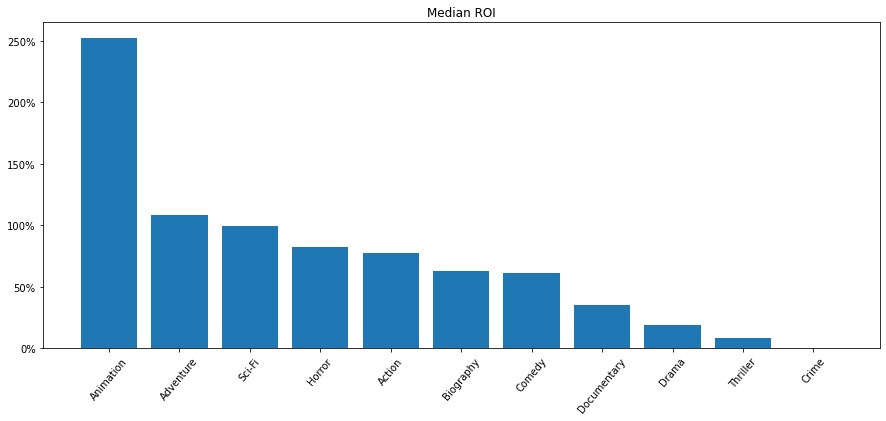

In [31]:
#plot primary genre vs median ROI
import matplotlib.ticker as mtick

data = prime_genre_df
genres = list(prime_genre_df['genre_primary'])
values = list(prime_genre_df['median'])

fig, axs = plt.subplots(figsize=(15, 6))
plt.xticks(rotation = 50) #Rotate X-axis tick labels
axs.bar(genres, values)
axs.yaxis.set_major_formatter(
    mtick.PercentFormatter()) #Reformat to percent
plt.title("Median ROI")


### Profitable Film Percentage by Genre
Another way to look at it would be to see what percentage of movies in a given genre were profitable. 

In [32]:
#new dataframe with profitability counts
profitable_genres = sep_genre_df.groupby(
    'genre_primary')['profitable'].agg(
        ['sum','count', 'mean', 'std']).reset_index()
# sorted by mean (which is percentage profitable)
profitable_genres =profitable_genres.sort_values('mean', ascending=False)
# Filter out genres with under 25 observations
profitable_genres = profitable_genres.loc[profitable_genres['count'] > 24]

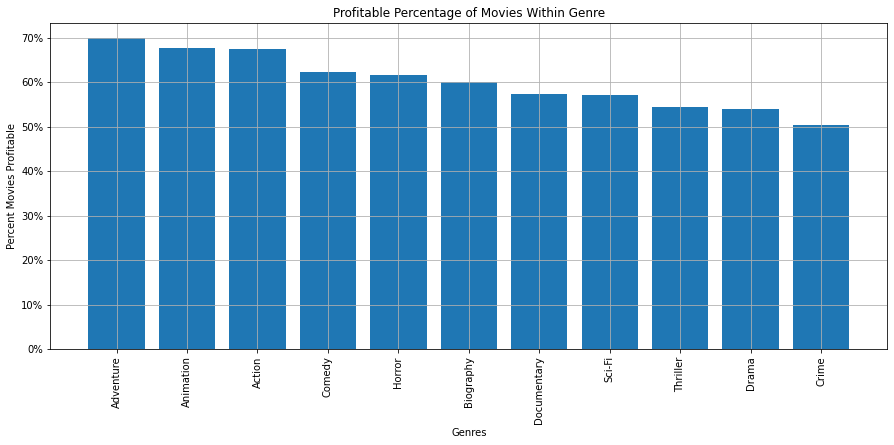

In [33]:
#Plot primary genres vs profitability percentage
genres = list(profitable_genres['genre_primary'])
values = list(profitable_genres['mean']*100)

fig, axs = plt.subplots(figsize=(15, 6))
plt.xticks(rotation = 90) #Rotate X-axis tick labels
axs.bar(genres, values)
axs.yaxis.set_major_formatter(mtick.PercentFormatter()) #Reformat to percent
plt.title("Profitable Percentage of Movies Within Genre")
plt.ylabel("Percent Movies Profitable")
plt.xlabel("Genres")
plt.grid()

Movies in the adventure genre are profitable 70 percent (rounded) of the time in this dataset, making adventure the most commonly profitable genre. Closely following the adventure genre is the animation and action genres, both around 67.5 percent profitable. 

The comedy and horror genres achieve profitability 62 percent (rounded) of the time. 

### Connecting Tables

I need to connect the movie basics dataframe with the movie ratings dataframe, and filter out all of the older movies, as the assignment specifically asked for current movies. 

In [34]:
#Join the tables
ratings_df = mb_df.set_index('movie_id').join(movie_ratings_df.set_index('movie_id'))
# Only interested in movies in the last 5 years
ratings_df = ratings_df.loc[ratings_df['start_year'] > 2016] 
# Filter out movies with less than 1000 ratings
ratings_df = ratings_df.loc[ratings_df['numvotes'] > 999]
# Sort by rating
ratings_df = ratings_df.sort_values('averagerating', ascending = False)



In [35]:
# Split the genres column into multiple columns, to seperate the genres.
genres_rtg_df = pd.concat([ratings_df, ratings_df['genres'].str.split(
    ',', expand=True)], axis=1)

# Rename columns
genres_rtg_df = genres_rtg_df.rename(
    columns={0: 'genre_primary', 1: 'genre_secondary', 2: 'genre_three'})

In [36]:
# Lets check out the ratings by genre
genre_ratings_df = genres_rtg_df.groupby(
    'genre_primary')['averagerating'].agg(
        ['median','count', 'mean', 'std']).reset_index()

# Filter out genres with under 25 observations
genre_ratings_df = genre_ratings_df.loc[genre_ratings_df['count'] > 24]
# Sort Ratings
genre_ratings_df = genre_ratings_df.sort_values('median', ascending = False)

## Movie Ratings by Genre

From this data, we see that the higher rated genres are not the same as the higher profiting genres. 

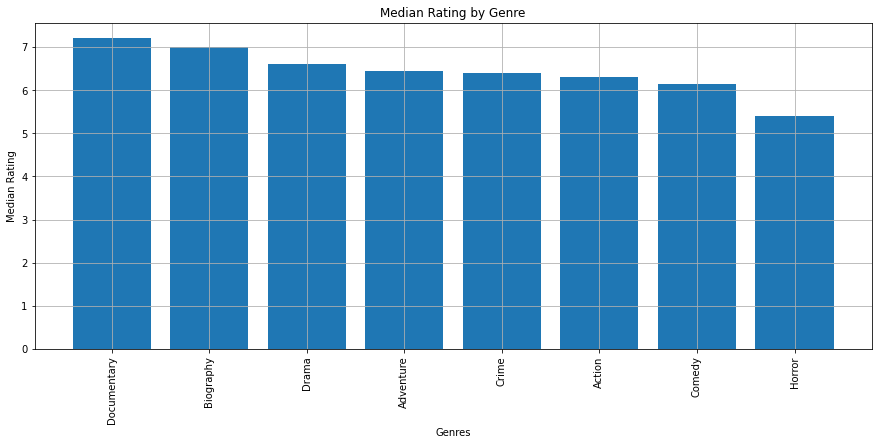

In [37]:
#Plot median rating by genre
genres = list(genre_ratings_df['genre_primary'])
values = list(genre_ratings_df['median'])

fig, axs = plt.subplots(figsize=(15, 6))
plt.xticks(rotation = 90) #Rotate X-axis tick labels
axs.bar(genres, values)
plt.title("Median Rating by Genre")
plt.ylabel("Median Rating")
plt.xlabel("Genres")
plt.grid()

## Profitable Directors

In [38]:
#Join movie basics and Directors
basics_n_dir = mb_df.set_index('movie_id').join(dir_df.set_index('movie_id'))
basics_n_dir = basics_n_dir.reset_index()

In [39]:
# join persons to director to get director name
basics_n_dir = pd.merge(basics_n_dir,persons_df,on='person_id',how='outer')
basics_n_dir = basics_n_dir.drop_duplicates()
basics_n_dir = basics_n_dir.rename(columns={'primary_name':'director'})

Now, I want to add in the ROI and profit metrics. 

In [40]:
basics_n_dir.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie,person_id,director,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Sunghursh,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",One Day Before the Rainy Season,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,The Other Side of the Wind,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",Sabse Bada Sukh,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"


In [41]:
#Join basics and directors with ROI
md_budgets = pd.merge(basics_n_dir, movie_budgets_df, on= 'movie', how = 'left')
md_budgets.reset_index()
md_budgets.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie,person_id,director,birth_year,death_year,primary_profession,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Sunghursh,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",One Day Before the Rainy Season,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,The Other Side of the Wind,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",Sabse Bada Sukh,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# remove NaN rows in the important categories
md_budgets = md_budgets.dropna(subset = ['worldwide_gross', 'director'])
md_budgets.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie,person_id,director,birth_year,death_year,primary_profession,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,ROI
5769,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight!,nm0440415,Lawrence Kasanoff,1959.0,NaN,"producer,writer,director",26.0,31-Dec-12,45000000.0,$0,73706.0,-44926294.0,-99.836209
5790,tt0293429,Mortal Kombat,Mortal Kombat,2021.0,NaN,"Action,Adventure,Fantasy",Mortal Kombat,nm2585406,Simon McQuoid,NaN,NaN,director,10.0,18-Aug-95,20000000.0,"$70,433,227",122133227.0,102133227.0,510.666135
5802,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,The Overnight,nm1208371,Jed I. Goodman,NaN,NaN,"camera_department,writer,producer",21.0,19-Jun-15,200000.0,"$1,109,808",1165996.0,965996.0,482.998000
5812,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",On the Road,nm0758574,Walter Salles,1956.0,NaN,"director,producer,writer",17.0,22-Mar-13,25000000.0,"$720,828",9313302.0,-15686698.0,-62.746792
5821,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,nm0001774,Ben Stiller,1965.0,NaN,"producer,actor,director",37.0,25-Dec-13,91000000.0,"$58,236,838",187861183.0,96861183.0,106.440860


In [43]:
# Add profitable column 
md_budgets['profitable'] = np.where(md_budgets['profit']> 0, 1, 0)
md_budgets.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie,person_id,director,birth_year,death_year,primary_profession,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,ROI,profitable
5769,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight!,nm0440415,Lawrence Kasanoff,1959.0,NaN,"producer,writer,director",26.0,31-Dec-12,45000000.0,$0,73706.0,-44926294.0,-99.836209,0
5790,tt0293429,Mortal Kombat,Mortal Kombat,2021.0,NaN,"Action,Adventure,Fantasy",Mortal Kombat,nm2585406,Simon McQuoid,NaN,NaN,director,10.0,18-Aug-95,20000000.0,"$70,433,227",122133227.0,102133227.0,510.666135,1
5802,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,The Overnight,nm1208371,Jed I. Goodman,NaN,NaN,"camera_department,writer,producer",21.0,19-Jun-15,200000.0,"$1,109,808",1165996.0,965996.0,482.998000,1
5812,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",On the Road,nm0758574,Walter Salles,1956.0,NaN,"director,producer,writer",17.0,22-Mar-13,25000000.0,"$720,828",9313302.0,-15686698.0,-62.746792,0
5821,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,nm0001774,Ben Stiller,1965.0,NaN,"producer,actor,director",37.0,25-Dec-13,91000000.0,"$58,236,838",187861183.0,96861183.0,106.440860,1


In [44]:
#Get rid of movies pre-2012
md_budgets = md_budgets.loc[md_budgets['start_year'] > 2011]

In [45]:
# Group by director
md_budgets = md_budgets.groupby('director')['profitable'].agg(
    ['sum','count', 'mean', 'std'])
md_budgets.head()


,sum,count,mean,std
director,,,,
Aaron Agrasanchez,1,1,1.0,NaN
Aaron Alon,0,1,0.0,NaN
Aaron Hann,0,1,0.0,NaN
Aaron Schnobrich,1,1,1.0,NaN
Aaron T. Wells,0,1,0.0,NaN


In [46]:
md_budgets.sort_values('count', ascending = False)

,sum,count,mean,std
director,,,,
Tim Story,7,8,0.875000,0.353553
Steven Spielberg,6,6,1.000000,0.000000
Peter Berg,4,6,0.666667,0.516398
David Gordon Green,3,6,0.500000,0.547723
Antoine Fuqua,5,5,1.000000,0.000000
...,...,...,...,...
John Lyde,0,1,0.000000,NaN
John Luksetich,1,1,1.000000,NaN
John Luessenhop,1,1,1.000000,NaN


Now, I want to see the directors who have made more than two movies in the last decade, and determine who has the best track record for profitability. I also want to filter out any director with under a 50% profitability rate. 

In [47]:
md_budgets = md_budgets.loc[md_budgets['count'] > 3]
md_budgets = md_budgets.sort_values('mean', ascending=False)

In [48]:
md_budgets = md_budgets.loc[md_budgets['mean'] > .75]

In [49]:
md_budgets= md_budgets.reset_index()

In [50]:
md_budgets.shape

(22, 5)

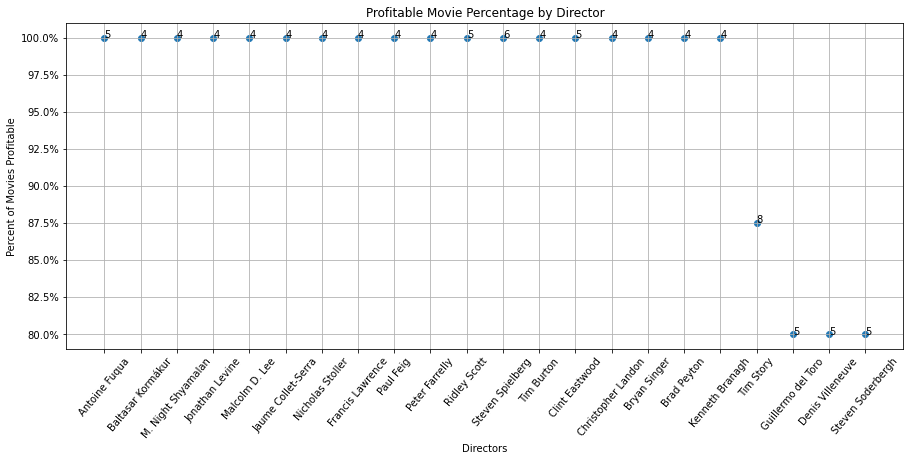

In [53]:
# Plot most profitable directors

x = list(md_budgets['mean']*100)
y = list(md_budgets['count'])
n = list(md_budgets['director'])

fig, axs = plt.subplots(figsize=(15,6))
axs.scatter(n,x)
plt.xticks(rotation = 50) #Rotate X-axis tick labels
axs.yaxis.set_major_formatter(mtick.PercentFormatter()) #Reformat to percent

for i, txt in enumerate(y):
    axs.annotate(txt, (n[i], x[i]))

plt.title("Profitable Movie Percentage by Director")
plt.ylabel("Percent of Movies Profitable")
plt.xlabel("Directors")
plt.grid()

From this, we see that we get a list of the most profitable directors by percentage of movies profitable. 

In [52]:
prof_directors = md_budgets['director']

print(f''' The 22 most consistantly profitable directors of the past ten years are: 
{prof_directors}''')

 The 22 most consistantly profitable directors of the past ten years are: 
0          Antoine Fuqua
1      Baltasar Kormákur
2     M. Night Shyamalan
3        Jonathan Levine
4         Malcolm D. Lee
5     Jaume Collet-Serra
6       Nicholas Stoller
7       Francis Lawrence
8              Paul Feig
9         Peter Farrelly
10          Ridley Scott
11      Steven Spielberg
12            Tim Burton
13        Clint Eastwood
14    Christopher Landon
15          Bryan Singer
16           Brad Peyton
17       Kenneth Branagh
18             Tim Story
19    Guillermo del Toro
20      Denis Villeneuve
21     Steven Soderbergh
Name: director, dtype: object


## Gross Revenue by Genre
Finally, I want to take a look at the types of movies that are returning the largest amount of nominal revenue. 

In [54]:

# Group by primary genres
prime_genre_df2 = sep_genre_df.groupby(
    'genre_primary')['worldwide_gross'].agg(
        ['median','count', 'mean', 'std']).reset_index()
# Sort by median value
prime_genre_df2 = prime_genre_df2.sort_values('median', ascending = False)
# Filter out primary genres with counts under 25
prime_genre_df2 = prime_genre_df2.loc[prime_genre_df2['count'] > 24]

Text(0.5, 1.0, 'Median Worldwide Gross')

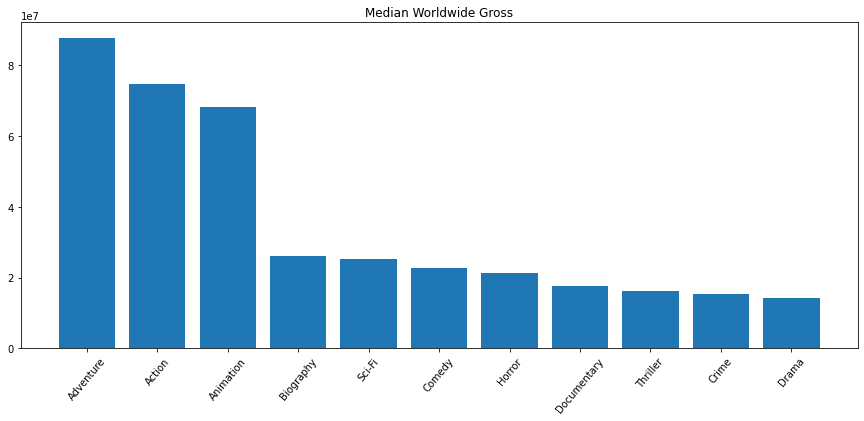

In [56]:
#plot primary genre vs median Worldwide Gross

x1 = list(prime_genre_df2['genre_primary'])
y1 = list(prime_genre_df2['median'])

fig, axs = plt.subplots(figsize=(15, 6))
plt.xticks(rotation = 50) #Rotate X-axis tick labels
axs.bar(x1, y1)
plt.title("Median Worldwide Gross")

## Conclusion

If the company is shooting for likelihood of profitability, they should focus on the five most consistantly profitable genres (in order): Adventure, Animation, Action, Comedy, and Horror. 

To improve the companies' probability of profitability, I would suggest they hire one of the 22 directors from the "most profitable directors" list, which all have 1) made more than 3 movies in the past ten years, and 2) have made profitable movies over 75 percent of the time.

If the company wants the best return on investment (ROI), they should consider making films in the following genres (in order): Animation, Adventure, Sci-Fi, Horror, Action.

If the company wants the highest top-line revenue (i.e., worldwide gross), they should consider making films in the genres Adventure, Action, or Animation. 

Finally, if the company wants to make highly-rated movies, they should consider making films in the genres (in order): Documentary, Biography, Drama, Adventure, Crime, Action, or Comedy. 

To consider multiple of these factors in the decision, the company should focus on Adventure, Animation, and Action, which all score highly in almost all of the categories considered. They should further look to hire one of the 22 directors on the list of most consistantly profitable directors. 

